In [ ]:
pip install scikit-plot

In [ ]:
import math
import numpy as np
import pandas as pd

import scikitplot
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# from keras.utils import np_utils

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# plantVillage Dataset

In [ ]:
ck = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/villagePlant/dataset/final.csv")
ck.head(10)

,emotion,pixels,ids
0,Apple___Apple_scab,123 108 116 123 108 116 124 109 117 115 100 10...,image (944).JPG
1,Apple___Apple_scab,191 158 162 227 194 198 196 163 167 157 124 12...,image (193).JPG
2,Apple___Apple_scab,166 132 139 166 130 136 167 133 139 160 131 13...,image (913).JPG
3,Apple___Apple_scab,60 27 34 106 73 80 138 105 112 151 118 126 153...,image (165).JPG
4,Apple___Apple_scab,45 25 20 46 26 21 45 25 20 45 25 20 43 23 18 4...,image (934).JPG
5,Apple___Apple_scab,196 169 178 202 175 184 207 180 189 206 179 18...,image (354).JPG
6,Apple___Apple_scab,167 125 143 163 121 139 168 126 144 163 121 13...,image (808).JPG
7,Apple___Apple_scab,191 162 165 195 166 169 193 164 167 194 165 16...,image (951).JPG
8,Apple___Apple_scab,177 154 158 183 160 164 186 163 167 180 157 16...,image (960).JPG
9,Apple___Apple_scab,184 153 160 184 153 160 189 158 165 189 158 16...,image (266).JPG


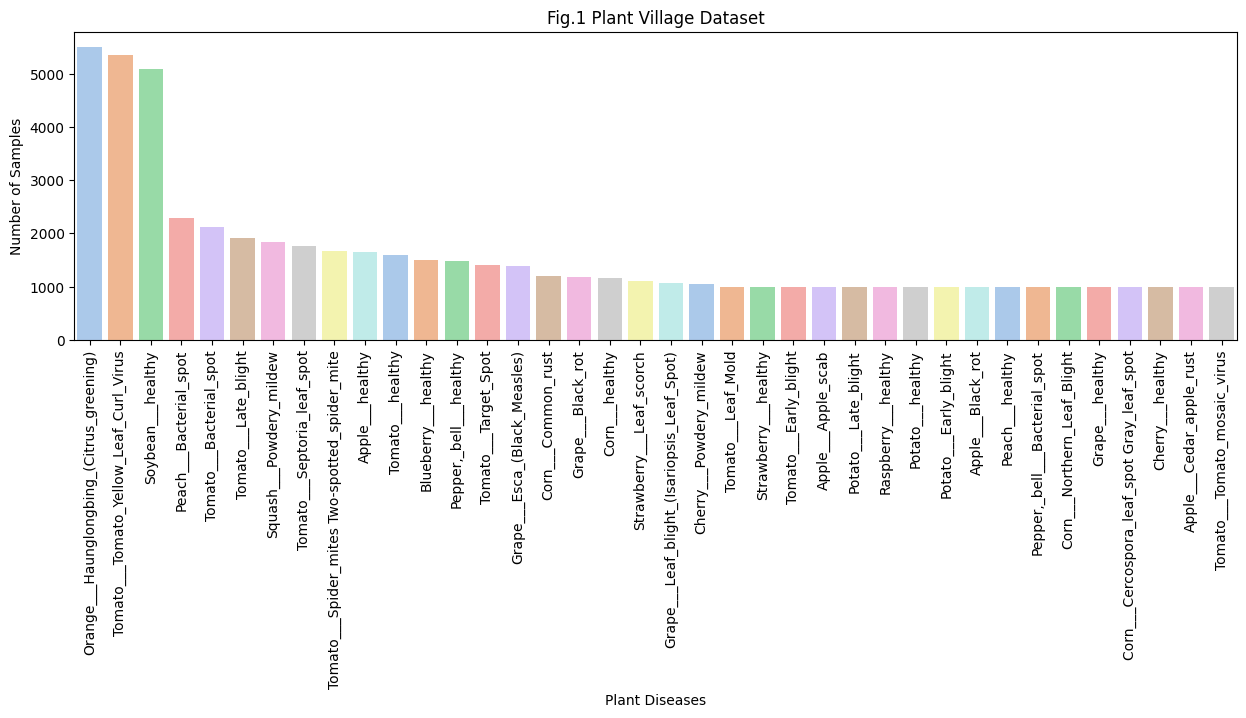

In [ ]:
plt.figure(figsize=(15, 4))
sns.countplot(x="emotion", data=ck, order=ck['emotion'].value_counts().index, palette='pastel')

plt.xlabel("Plant Diseases")
plt.ylabel("Number of Samples")
plt.title("Fig.1 Plant Village Dataset")
plt.xticks(rotation=90)
plt.show()

In [ ]:
ck.emotion.value_counts()

Orange___Haunglongbing_(Citrus_greening)         5507
Tomato___Tomato_Yellow_Leaf_Curl_Virus           5357
Soybean___healthy                                5090
Peach___Bacterial_spot                           2297
Tomato___Bacterial_spot                          2127
Tomato___Late_blight                             1909
Squash___Powdery_mildew                          1835
Tomato___Septoria_leaf_spot                      1771
Tomato___Spider_mites Two-spotted_spider_mite    1676
Apple___healthy                                  1645
Tomato___healthy                                 1591
Blueberry___healthy                              1502
Pepper,_bell___healthy                           1478
Tomato___Target_Spot                             1404
Grape___Esca_(Black_Measles)                     1383
Corn___Common_rust                               1192
Grape___Black_rot                                1180
Corn___healthy                                   1162
Strawberry___Leaf_scorch    

In [ ]:
del ck

# Data split for transerfer learning

In [ ]:
import pandas as pd
import numpy as np

# Load the csv
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/villagePlant/dataset/final.csv")

# Classes with value counts less than 1500
low_count_classes = df['emotion'].value_counts()[df['emotion'].value_counts() < 1500].index.tolist()

# Randomly choose 10 classes
chosen_10 = np.random.choice(low_count_classes, 10, replace=False)
subset_10 = df[df['emotion'].isin(chosen_10)]

# Update the list to exclude the selected classes
remaining_classes = list(set(df['emotion'].unique()) - set(chosen_10))

# Randomly choose 5 from the remaining classes
chosen_5 = np.random.choice(remaining_classes, 5, replace=False)
subset_5 = df[df['emotion'].isin(chosen_5)]

# Save to CSV
subset_10.to_csv("/content/drive/MyDrive/Colab Notebooks/villagePlant/dataset/final/subset_10_classes_1.csv", index=False)
subset_5.to_csv("/content/drive/MyDrive/Colab Notebooks/villagePlant/dataset/final/subset_5_classes_1.csv", index=False)


In [ ]:
# Save to CSV
subset_10 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/villagePlant/dataset/final/subset_10_classes_1.csv")
subset_5 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/villagePlant/dataset/final/subset_5_classes_1.csv")

print(subset_10.emotion.unique())
print(subset_5.emotion.unique())

['Apple___Apple_scab' 'Apple___Black_rot'
 'Corn___Cercospora_leaf_spot Gray_leaf_spot' 'Corn___Common_rust'
 'Corn___healthy' 'Peach___healthy' 'Potato___healthy'
 'Strawberry___Leaf_scorch' 'Tomato___Early_blight'
 'Tomato___Tomato_mosaic_virus']
['Apple___Cedar_apple_rust' 'Grape___Esca_(Black_Measles)'
 'Strawberry___healthy' 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'
 'Tomato___Septoria_leaf_spot']


In [ ]:
del subset_10, subset_5

In [ ]:
import pandas as pd
import numpy as np

# Load the csv
# df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/villagePlant/dataset/final.csv")

# Classes with value counts less than 1500
low_count_classes = df['emotion'].value_counts()[df['emotion'].value_counts() < 1500].index.tolist()

# Randomly choose 10 classes
chosen_10 = np.random.choice(low_count_classes, 10, replace=False)
subset_10 = df[df['emotion'].isin(chosen_10)]

# Update the list to exclude the selected classes
remaining_classes = list(set(df['emotion'].unique()) - set(chosen_10))

# Randomly choose 5 from the remaining classes
chosen_5 = np.random.choice(remaining_classes, 5, replace=False)
subset_5 = df[df['emotion'].isin(chosen_5)]

# Save to CSV
subset_10.to_csv("/content/drive/MyDrive/Colab Notebooks/villagePlant/dataset/final/subset_10_classes_2.csv", index=False)
subset_5.to_csv("/content/drive/MyDrive/Colab Notebooks/villagePlant/dataset/final/subset_5_classes_2.csv", index=False)


In [ ]:
# Save to CSV
subset_10 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/villagePlant/dataset/final/subset_10_classes_2.csv")
subset_5 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/villagePlant/dataset/final/subset_5_classes_2.csv")

print(subset_10.emotion.unique())
print(subset_5.emotion.unique())

['Apple___Black_rot' 'Corn___Cercospora_leaf_spot Gray_leaf_spot'
 'Grape___healthy' 'Grape___Esca_(Black_Measles)'
 'Corn___Northern_Leaf_Blight'
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'
 'Pepper,_bell___Bacterial_spot' 'Potato___healthy'
 'Tomato___Early_blight' 'Tomato___Leaf_Mold']
['Apple___Apple_scab' 'Blueberry___healthy' 'Cherry___healthy'
 'Potato___Late_blight' 'Tomato___Target_Spot']


In [ ]:
del subset_10, subset_5

In [ ]:
del subset_10, subset_5

import pandas as pd
import numpy as np

# Load the csv
# df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/villagePlant/dataset/final.csv")

# Classes with value counts less than 1500
low_count_classes = df['emotion'].value_counts()[df['emotion'].value_counts() < 1500].index.tolist()

# Randomly choose 10 classes
chosen_10 = np.random.choice(low_count_classes, 10, replace=False)
subset_10 = df[df['emotion'].isin(chosen_10)]

# Update the list to exclude the selected classes
remaining_classes = list(set(df['emotion'].unique()) - set(chosen_10))

# Randomly choose 5 from the remaining classes
chosen_5 = np.random.choice(remaining_classes, 5, replace=False)
subset_5 = df[df['emotion'].isin(chosen_5)]

# Save to CSV
subset_10.to_csv("/content/drive/MyDrive/Colab Notebooks/villagePlant/dataset/final/subset_10_classes_3.csv", index=False)
subset_5.to_csv("/content/drive/MyDrive/Colab Notebooks/villagePlant/dataset/final/subset_5_classes_3.csv", index=False)


In [ ]:
# Save to CSV
subset_10 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/villagePlant/dataset/final/subset_10_classes_3.csv")
subset_5 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/villagePlant/dataset/final/subset_5_classes_3.csv")

print(subset_10.emotion.unique())
print(subset_5.emotion.unique())

['Cherry___Powdery_mildew' 'Corn___Common_rust' 'Grape___healthy'
 'Grape___Black_rot' 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'
 'Peach___healthy' 'Pepper,_bell___healthy' 'Potato___healthy'
 'Strawberry___Leaf_scorch' 'Tomato___Early_blight']
['Apple___healthy' 'Blueberry___healthy' 'Cherry___healthy'
 'Grape___Esca_(Black_Measles)'
 'Tomato___Spider_mites Two-spotted_spider_mite']


In [ ]:
del subset_10, subset_5